# Detecting car path

### Initialize and load reference image

I choose to use the shot0003.png as reference image, since it is the first step of the car.
Then, I used the absolute difference between images to identify each step of the car, and ajusted the images to find the better mask.
Then, I applied the OpenCV center of countor and plot the dots.

Some parts are the same adopted in the class. I maintained the structure of the jupyter notebook, of "Values Domain Examples" 


In [204]:
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual


### Load a Reference Image


In [171]:
#List to save all points calculated for each img.
points = []

### Applying absolute difference between each image

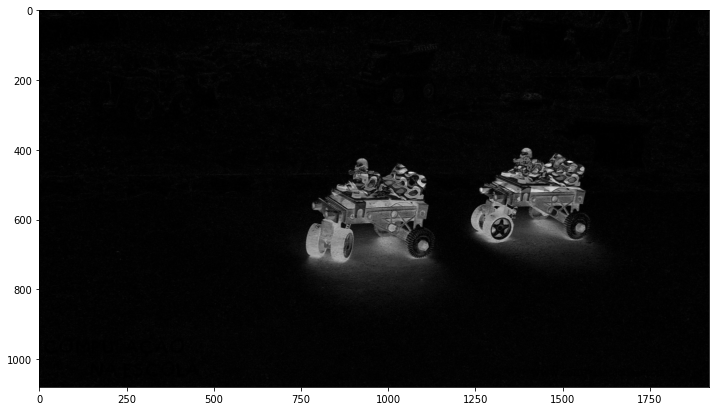

In [246]:
#change the name of file ref and file orig according the necessity
file_ref = "C:/Users/LabEEE_3-7/Desktop/Tiago/Tese/Visao computacional/experimento/shot0008.png"
file_orig = "C:/Users/LabEEE_3-7/Desktop/Tiago/Tese/Visao computacional/experimento/shot0012.png"


img_ref = cv2.imread(file_ref, cv2.IMREAD_GRAYSCALE)
gray = cv2.imread(file_orig, cv2.IMREAD_GRAYSCALE)

#For img 7 it is important to multiply
#gray = cv2.multiply(gray, 1.8)

#test to use the absolute difference between img_ref as reference. This didn't work
change_ref = cv2.absdiff(img_ref, img_ref)

#real absolute difference, aopted for each image
change= cv2.absdiff(img_ref, gray)

plt.figure(figsize = (12,10))
plt.imshow(change, 'gray')

### Simple Thresholds in OpenCV

In [247]:
#Adopted the thresholds given in class
#For each image it is important to find the new threshold

modes = ['cv2.THRESH_BINARY',
         'cv2.THRESH_BINARY_INV',
         'cv2.THRESH_TRUNC',
         'cv2.THRESH_TOZERO',
         'cv2.THRESH_TOZERO_INV']

# Basic threshold example
def my_threshold(thresh, modeStr):
    global change
    global dst
    mode = eval(modeStr)
    th, dst = cv2.threshold(change, thresh, 255, mode)
    plt.figure(figsize = (12,10))
    # Show it!
    plt.imshow(dst, 'gray')

# Pass function & its parameters to interactive
interactive(my_threshold, thresh = (0, 255), modeStr=modes)

#for image 13 71 threshold is best


interactive(children=(IntSlider(value=127, description='thresh', max=255), Dropdown(description='modeStr', opt…

### Extract the original Pixels of what you've found: Image Multiplication

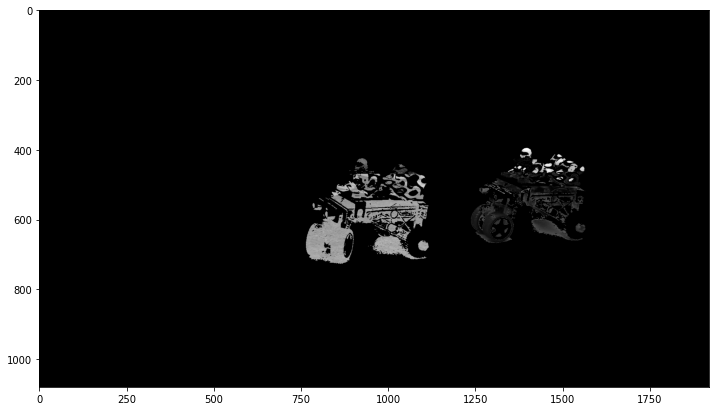

In [248]:
#As seen in class, get pixels from the image with image multiplication

masked = cv2.multiply(gray, (dst//255))
# Set the size to show
plt.figure(figsize = (12,10))
# Show it!
plt.imshow(masked, 'gray')

## 2. Refining the image

Adopted same strategies showed in class

In [ ]:
#most sofisticated kernel
#It is good to made changes in the matrix to see the difference for each picture
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,9))
kernel

### *Open* the Mask with your Kernel

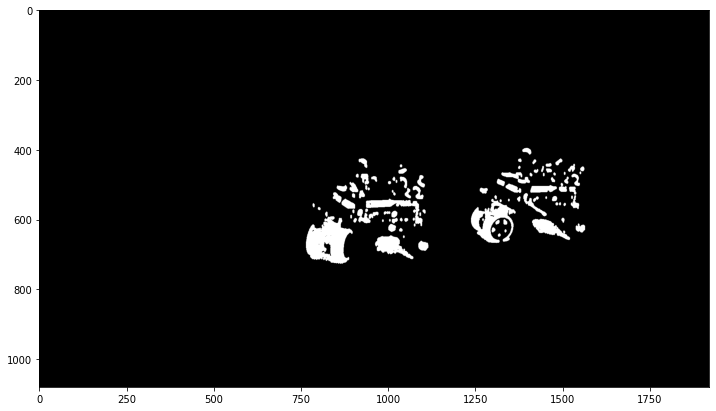

In [249]:
#Apply the kernel in the image
opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)
# Set the size to show
plt.figure(figsize = (12,10))
# Show it!
plt.imshow(opening, 'gray')

### *Close* the openend Mask with your Kernel

In [184]:
#This kernel is very important and is easy to see the difference between a low number and a high number
#For me the size of 47 worked well, since made the edges more regular

def myKernel(size):
    global kernel2
    kernel2 = np.ones((size,size),np.uint8)
    print(kernel2)

interactive(myKernel, size=(5,55,2))
#41 for img 13

interactive(children=(IntSlider(value=29, description='size', max=55, min=5, step=2), Output()), _dom_classes=…

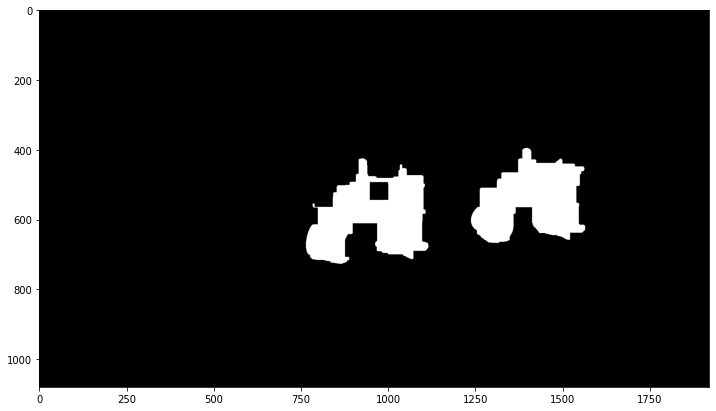

In [250]:
#Applying the kernel in pictures. 

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)

plt.figure(figsize = (12,10))
plt.imshow(closing, 'gray')

### Calculate the contour centroid

Here I adopted the example given in https://pyimagesearch.com/2016/02/01/opencv-center-of-contour/
Also I adopted an empy list "points" and add each point to this list.
Then I plotted the list in the image reference, and draw lines with line plot.

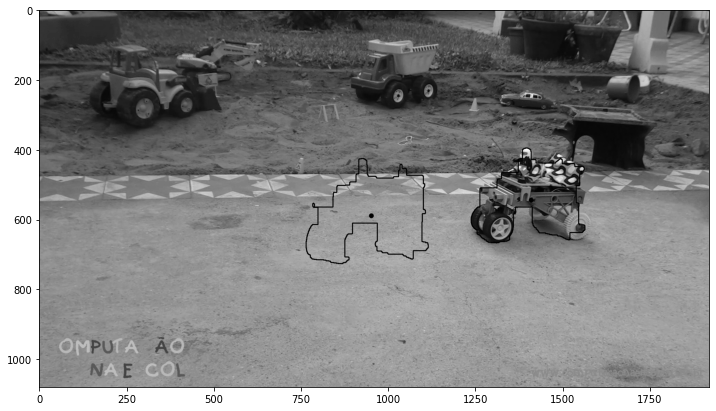

In [252]:

import imutils

cnts = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])

	# draw the contour and center of the shape on the image
	cv2.drawContours(gray, [c], -1, (0, 255, 0), 2)
	cv2.circle(gray, (cX, cY), 7, (0,0,0), -1)

	#append each point to points list
	points.append((cX, cY))


#plot image to verify if the points are ok or if needs more pre processing steps.
plt.figure(figsize = (12,10))
# Show it!
plt.imshow(gray, 'gray')

[(1891, 844), (1737, 675), (1270, 596), (1532, 640), (953, 589), (1736, 673), (1269, 591), (1729, 666), (1217, 584), (1891, 843), (1733, 674), (952, 589), (1731, 674), (1149, 568), (1410, 544)]


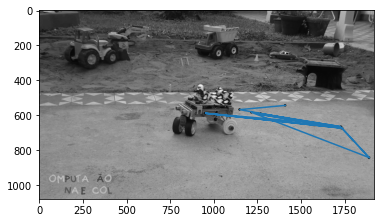

In [278]:
#Since the image 3 is ref for almost all images, it is important to clean duplicate points.
#Thus I cleared the point lists
cleanpoints = list(dict.fromkeys(points))

#Just reaload the image reference to see the points plotted in the image. I choose to reload the image here so I can choose the best image
#to draw the points. I think shoot0008.png is the best image to see the points, since the shot0003.png was the reference.

img_ref = "C:/Users/LabEEE_3-7/Desktop/Tiago/Tese/Visao computacional/experimento/shot0008.png"
img_ref = cv2.imread(img_ref, cv2.IMREAD_GRAYSCALE)

#for each tuple in clarpoints, draw the points in the reference image
for point in cleanpoints:
    cv2.circle(img_ref, point, 7, (0,0,0), -1)

#plot the points and line plot in the image
f, ax = plt.subplots(1)
ax.plot(*zip(*cleanpoints))
plt.imshow(img_ref, 'gray')

#If needed, save the figure 
#plt.savefig('iamge with points')